In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from ipynb.fs.defs.Fotos import loadImageAsGray

In [434]:
#size = 128
#step = 64


img = loadImageAsGray("./Imagenes/PennFudanPed/PNGImages/FudanPed00002.png")
x , y = img.shape
print(x)
print(y)

stop_x = x
stop_y = y

def getWindow(x,y,size=128,step=64):
    ventanas = []
    for j in range(0,x-step,step):
        if j+size > x:
            j=x-size
        for i in range(0,y-step,step):
            if i+size > y:
                i=y-size
            window = {
                'xmin': j,
                'xmax': j+size,
                'ymin': i,
                'ymax': i+size
            }
            yield window



414
455


<generator object getWindow at 0x11e590dd0>

In [ ]:
threshold = 120

def applyModel(x,y,size,step):
    for i in getWindow(x,y,size,step):
        crop = img[i['xmin']:i['xmax'],i['ymin']:i['ymax']]
        #plt.imshow(crop)
        
        current_heatmap= np.zeros((x,y), dtype=np.uint8)
        summed_heatmap = np.zeros_like(current_heatmap, dtype=np.uint8)
        summed_heatmap[summed_heatmap <= threshold] = 0
        yield crop
        
a = applyModel(x,y,size,step)

(414, 455)

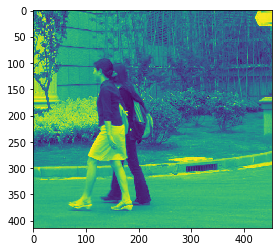

In [436]:
plt.imshow(img)
img.shape

In [391]:
x,y=img.shape

[[101 113  99 ... 169 167 163]
 [ 75  81  88 ... 162 163 163]
 [ 71 113 117 ... 166 169 171]
 ...
 [191 217 194 ... 171 173 175]
 [139 138 132 ... 160 164 168]
 [154 119  93 ... 153 158 162]]


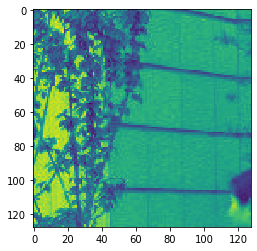

In [438]:
def applyModel(x,y,size,step):
    for i in getWindow(x,y,size,step):
        crop = img[i['xmin']:i['xmax'],i['ymin']:i['ymax']]
        print(crop)
        plt.imshow(crop)
        return crop
a = applyModel(x,y,size,step)

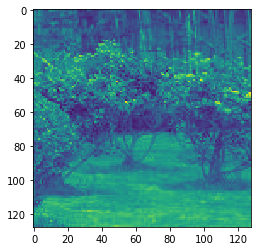

In [433]:
kkkkkkk = next(a)

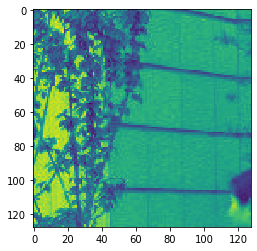

In [394]:
plt.imshow(kkkkkkk)

In [ ]:
'''
{'x': getWindowInRows(0)['xmin'],
'xmax': getWindowInRows(0)[-1]['xmax'],
'ymin': j,
'ymax': j + window_size}
'''
'''
def getWindowInRows(stop_x,stop_y):
    ventanas = []
    #persona=[]
    for j in range(0,stop_y-step-1,step):
        for i in range(0,stop_x-step,step):
            if (j + window_size>stop_y) and (i + window_size > stop_x):
                window = {
                'xmin': stop_x - window_size,
                'xmax': stop_x,
                'ymin': stop_y - window_size,
                'ymax': stop_y
            }
            elif (i + window_size > stop_x):
                window = {
                'xmin': stop_x - window_size,
                'xmax': stop_x,
                'ymin': j,
                'ymax': j + window_size
            }
            elif (j + window_size>stop_y):
                window = {
                'xmin': i,
                'xmax': i + window_size,
                'ymin': stop_y - window_size,
                'ymax': stop_y
            }
            else:
                window = {
                    'xmin': i,
                    'xmax': i + window_size,
                    'ymin': j,
                    'ymax': j + window_size
                }
            ventanas.append(window)
            #p=model.predict(window)
            #persona.append(p)
    return ventanas
    #return persona

getWindowInRows(stop_x,stop_y)
'''